# Câu 1: Tạo dataframe (df) biểu diễn bộ dữ liệu thô

## Load data

In [80]:
import pandas as pd
import numpy as np

url = 'https://gitlab.com/uitgit/datasets/-/raw/master/auto_lab.csv'
df = pd.read_csv(url)

## insight cơ bản nhất của dataset

In [81]:
# kich thuoc bo dư lieu
df.shape

(204, 26)

In [82]:
# Giá trị null và kiểu dữ liệu feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            203 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.6         201 non-null    object 
 10  168.8        203 non-null    object 
 11  64.1         204 non-null    object 
 12  48.8         204 non-null    float64
 13  2548         202 non-null    object 
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

# câu 2: tạo header cho các cột tương ứng với danh sách đặt tên như sau:xuất 9 sample đầu tiên, 6 sample cuối và 8 sample bất kỳ. Kết quả tổng hợp thành 1 df khác

In [83]:
header=["symboling","normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors","body-style", "drive-wheels", "engine-location", "wheel-base", "length","width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower","peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = header
df.head()

symboling normalized-losses         make  ... city-mpg highway-mpg  price
0          3                 ?  alfa-romero  ...       21          27  16500
1          1                 ?  alfa-romero  ...       19          26  16500
2          2               164         audi  ...       24          30  13950
3          2               164         audi  ...       18          22  17450
4          2                 ?         audi  ...       19          25  15250

[5 rows x 26 columns]

In [84]:
# 9 sample đầu tiên
df_head9 = df.head(9)
df_head9

symboling normalized-losses         make  ... city-mpg highway-mpg  price
0          3                 ?  alfa-romero  ...       21          27  16500
1          1                 ?  alfa-romero  ...       19          26  16500
2          2               164         audi  ...       24          30  13950
3          2               164         audi  ...       18          22  17450
4          2                 ?         audi  ...       19          25  15250
5          1               158         audi  ...       19          25  17710
6          1                 ?         audi  ...       19          25  18920
7          1               158         audi  ...       17          20  23875
8          0                 ?         audi  ...       16          22      ?

[9 rows x 26 columns]

In [85]:
# 6 sample cuối
df_tail6 = df.tail(6)
df_tail6

symboling normalized-losses   make  ... city-mpg highway-mpg  price
198         -1                74  volvo  ...       17          22  18950
199         -1                95  volvo  ...       23          28  16845
200         -1               NaN  volvo  ...       19          25  19045
201         -1                95  volvo  ...       18          23  21485
202         -1                95  volvo  ...       26          27  22470
203         -1                95  volvo  ...       19          25  22625

[6 rows x 26 columns]

In [86]:
# 8 sample bất kỳ

df_sample8 = df.sample(8)
df_sample8

symboling normalized-losses        make  ... city-mpg highway-mpg  price
182          2               122  volkswagen  ...       27          34   7975
30           2               137       honda  ...       31          38   6855
142          0               102      subaru  ...       26          32   9960
34           0               110       honda  ...       30          34   7295
100          0               128      nissan  ...       17          22  13499
101          0               108      nissan  ...       17          22  14399
16           0                 ?         bmw  ...       15          20  36880
173         -1                65      toyota  ...       30          33  10698

[8 rows x 26 columns]

In [87]:
# merging data
df_c2 = pd.concat([df_head9, df_tail6, df_sample8], ignore_index=True)
df_c2.to_csv('data_c2.csv')

# Câu 3: Chuyển đổi '?','.','','_','Na','NULL','null','not','Not' sang NaN/nan

In [88]:
df.replace(['?','.','','_','Na','NULL','null','not','Not'],'nan', inplace=True)

#Câu 4: kiểm tra kiểu dữ liệu của mỗi attribute trong df. Sau đó chuyển về kiểu cho phù hợp

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  203 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         201 non-null    object 
 10  length             203 non-null    object 
 11  width              204 non-null    object 
 12  height             204 non-null    float64
 13  curb-weight        202 non-null    object 
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [90]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce').astype('Int64')
df["width"] = df["width"].astype("float")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base            object
length                object
width                float64
height               float64
curb-weight           object
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             Int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#Câu 5: chuyển từ df đang có sang kiểu mảng 2 chiều trong numpy

In [91]:
df.values

array([[3, nan, 'alfa-romero', ..., 21, 27, 16500.0],
       [1, nan, 'alfa-romero', ..., 19, 26, 16500.0],
       [2, 164.0, 'audi', ..., 24, 30, 13950.0],
       ...,
       [-1, 95.0, 'volvo', ..., 18, 23, 21485.0],
       [-1, 95.0, 'volvo', ..., 26, 27, 22470.0],
       [-1, 95.0, 'volvo', ..., 19, 25, 22625.0]], dtype=object)

# Câu 6: số lượng feature bị khuyết giá trị? Tổng số lượng giá trị bị khuyết

In [92]:
# tong so luong gia tri bi khuye
df.isnull().sum().sum()

67

In [93]:
# so luong feature bi khuyet
df.isnull().sum()

symboling             0
normalized-losses    42
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            3
length                1
width                 1
height                0
curb-weight           2
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 6
dtype: int64

# Cau 7: Đánh giá xem dataset có bao nhiêu phần trăm sample bị khuyết giá trị

In [51]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)

normalized-losses    0.205882
price                0.029412
stroke               0.019608
bore                 0.019608
wheel-base           0.014706
horsepower           0.009804
peak-rpm             0.009804
curb-weight          0.009804
width                0.004902
length               0.004902
make                 0.000000
engine-location      0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
fuel-type            0.000000
height               0.000000
highway-mpg          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
compression-ratio    0.000000
city-mpg             0.000000
symboling            0.000000
dtype: float64

# Câu 8: Dùng phương pháp để thay thế replace để xử lý các giá trị bị khuyết

In [67]:
df['normalized-losses']= df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode())

# Cau 9: KNN de dien du lieu thieu

In [ ]:
df.info()

In [79]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df.select_dtypes('float64'))
cols_float = list(df.select_dtypes('float64').columns)
df[cols_float] = imputer.transform(df.select_dtypes('float64'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         201 non-null    object 
 10  length             203 non-null    object 
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        202 non-null    object 
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

# caau 10: dung pp loai bo drop cho cac sample doi voi cac feature bi khuye

In [104]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [103]:
df.dropna(subset=["price",'wheel-base','length', 'width', 'curb-weight','normalized-losses'],
            axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

# Caau 11: ham kiem tra xem 1 df co con bi khuyet du lieu khong? neu khong tra ve true, nguoc lai false

In [109]:
def check_missing_value(x):
  if x.isnull().sum().sum()==0:
    return True
  elif x.isnull().sum().sum()>0:
    return False


In [110]:
check_missing_value(df)

False

## cau 12: chuan hoa "length", "width" va "height" trong pham vi [0,1]

In [117]:
df['length'] = df['length'].astype('float64')

In [118]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

In [119]:
df.loc[:,['length', 'width', 'height']]

length     width    height
0    0.871668  0.923291  0.908027
1    0.871668  0.926081  0.908027
2    0.951135  0.995816  0.931438
3    0.951135  0.995816  0.934783
4    0.872655  0.903766  0.908027
..        ...       ...       ...
149  0.931885  0.937238  0.961538
150  0.931885  0.960948  0.928094
151  0.931885  0.960948  0.928094
152  0.931885  0.960948  0.928094
153       NaN  0.960948  0.928094

[154 rows x 3 columns]

#Câu 13: Tạo các bin ['low','medium','high;] cho horsepower và price

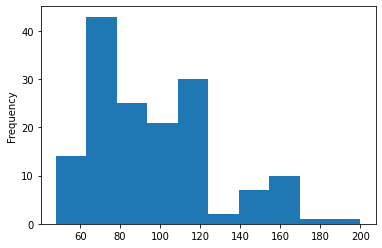

In [120]:
# vẽ histogram cho horsepower xem sự phân bố
import matplotlib.pyplot as plt
df['horsepower'].plot(kind = 'hist')

In [121]:
# xay dung 1 mang bin, voi gia tri min den max
bins = np.linspace(min(df['horsepower']), max(df['horsepower']),4)

In [123]:
names= ['Low','Medium','High']
df['horsepower-bin'] = pd.cut(df['horsepower'], bins, labels=names, include_lowest=True)
df[['horsepower','horsepower-bin']].head(5)

horsepower horsepower-bin
0         102         Medium
1         115         Medium
2         110         Medium
3         140         Medium
4         101         Medium

In [124]:
df[['horsepower','horsepower-bin']].head(20)

horsepower horsepower-bin
0          102         Medium
1          115         Medium
2          110         Medium
3          140         Medium
4          101         Medium
5          121         Medium
6          121         Medium
7           48            Low
8           70            Low
9           70            Low
10          68            Low
11          68            Low
12          68            Low
13          68            Low
14          88            Low
15         145         Medium
16          58            Low
17          76            Low
18          60            Low
19          76            Low